                Name : Subash Pradhan
                Student Id: C0916422
                PySpark Assignment in Databricks

                  Step 1: Data Loading and Initial Exploration

In [0]:
# Import Spark Session
from pyspark.sql import SparkSession

In [0]:
# Importing Necessary libraries
from pyspark.sql.functions import col, when, concat, lit, to_date, dayofweek, count,month,year
from pyspark.sql.functions import regexp_replace
from pyspark.sql import functions as F
from pyspark.ml.feature import Imputer
# Plot using Matplotlib
import matplotlib.pyplot as plt

In [0]:
# Initialize Spark session
spark = SparkSession.builder.appName("FlightDelays&Cancellation").getOrCreate()

  1.1 Load Data

In [0]:
# Load the dataset from the uploaded location
file_path = "dbfs:/FileStore/flights.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

  1.2 Initial Exploration

In [0]:
# Display schema
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [0]:
# Display the first 10 rows of the DataFrame
display(df.limit(10))

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,US,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null
2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null
2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44,14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null
2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null
2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33,3,12,45,221,203,186,1747,651,5,711,656,-15,0,0,null,null,null,null,null,null


In [0]:
# Count the number of rows and columns.
num_rows = df.count()
num_columns = len(df.columns)
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")


Number of rows: 5819079, Number of columns: 31


QUESTIONS:
How many rows and columns does the dataset contain?

Answer : There are 5819079 rows and 31 columns.

What are the data types of each column?

Answer: The data types of each column are displayed using printSchema(). Here are the data types of each column in text form: YEAR: integer,MONTH: integer,DAY: integer,DAY_OF_WEEK: integer,AIRLINE: string,FLIGHT_NUMBER: integer,TAIL_NUMBER: string,ORIGIN_AIRPORT: string,DESTINATION_AIRPORT: string,SCHEDULED_DEPARTURE: integer,DEPARTURE_TIME: integer,DEPARTURE_DELAY: integer,TAXI_OUT: integer,WHEELS_OFF: integer,SCHEDULED_TIME: integer,ELAPSED_TIME: integer,AIR_TIME: integer,DISTANCE: integer,WHEELS_ON: integer,TAXI_IN: integer,SCHEDULED_ARRIVAL: integer,ARRIVAL_TIME: integer,ARRIVAL_DELAY: integer,DIVERTED: integer,CANCELLED: integer,CANCELLATION_REASON: string,AIR_SYSTEM_DELAY: integer,SECURITY_DELAY: integer,AIRLINE_DELAY: integer,LATE_AIRCRAFT_DELAY: integer,WEATHER_DELAY: integer

    Step 2: Data Cleaning and Transformation**

  2.1. Handle Missing Values

In [0]:
# Count the number of missing values in each column
missing_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns])
display(missing_counts)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,0,0,0,0,14721,0,0,0,86153,86153,89047,89047,6,105071,105071,0,92513,92513,0,92513,105071,0,0,5729195,4755640,4755640,4755640,4755640,4755640


In [0]:
# Impute missing values for numerical columns with mean or median
from pyspark.ml.feature import Imputer

numerical_columns = ['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 
                     'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME','WHEELS_ON', 'TAXI_IN','ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY' , 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

imputer = Imputer(inputCols=numerical_columns, outputCols=[f"{col}_imputed" for col in numerical_columns]).setStrategy("median")
df = imputer.fit(df).transform(df)

In [0]:
# Impute categorical columns with "Unknown" for missing values
categorical_columns = ['TAIL_NUMBER','CANCELLATION_REASON',]

for column in categorical_columns:
    df = df.na.fill({column: 'Unknown'})


    2.2 Feature Engineering: Create new features that may be useful for analysis.

Conversion of  the FLIGHT_DATE column to extract features like DAY_OF_WEEK or MONTH is not 
required since the dataset already contains as per the criteria .

In [0]:
# Create binary columns for different delay types
df = df.withColumn("WasDelayed", when(col("ARRIVAL_DELAY") > 0, 1).otherwise(0))
df = df.withColumn("WasDepartureDelayed", when(col("DEPARTURE_DELAY") > 0, 1).otherwise(0))
df = df.withColumn("WasArrivalLate", when(col("ARRIVAL_DELAY") > 0, 1).otherwise(0))
df = df.withColumn("AirSystemDelayOccurred", when(col("AIR_SYSTEM_DELAY") > 0, 1).otherwise(0))
df = df.withColumn("SecurityDelayOccurred", when(col("SECURITY_DELAY") > 0, 1).otherwise(0))
df = df.withColumn("AirlineDelayOccurred", when(col("AIRLINE_DELAY") > 0, 1).otherwise(0))
df = df.withColumn("LateAircraftDelayOccurred", when(col("LATE_AIRCRAFT_DELAY") > 0, 1).otherwise(0))
df = df.withColumn("WeatherDelayOccurred", when(col("WEATHER_DELAY") > 0, 1).otherwise(0))


In [0]:
# Show updated schema and a sample of the transformed data
df.printSchema()
display(df.limit(10))

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = false)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (nul

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_TIME_imputed,DEPARTURE_DELAY_imputed,TAXI_OUT_imputed,WHEELS_OFF_imputed,SCHEDULED_TIME_imputed,ELAPSED_TIME_imputed,AIR_TIME_imputed,WHEELS_ON_imputed,TAXI_IN_imputed,ARRIVAL_TIME_imputed,ARRIVAL_DELAY_imputed,AIR_SYSTEM_DELAY_imputed,SECURITY_DELAY_imputed,AIRLINE_DELAY_imputed,LATE_AIRCRAFT_DELAY_imputed,WEATHER_DELAY_imputed,WasDelayed,WasDepartureDelayed,WasArrivalLate,AirSystemDelayOccurred,SecurityDelayOccurred,AirlineDelayOccurred,LateAircraftDelayOccurred,WeatherDelayOccurred
2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,Unknown,null,null,null,null,null,2354,-11,21,15,205,194,169,404,4,408,-22,2,0,2,3,0,0,0,0,0,0,0,0,0
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,Unknown,null,null,null,null,null,2,-8,12,14,280,279,263,737,4,741,-9,2,0,2,3,0,0,0,0,0,0,0,0,0
2015,1,1,4,US,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,Unknown,null,null,null,null,null,18,-2,16,34,286,293,266,800,11,811,5,2,0,2,3,0,1,0,1,0,0,0,0,0
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,Unknown,null,null,null,null,null,15,-5,15,30,285,281,258,748,8,756,-9,2,0,2,3,0,0,0,0,0,0,0,0,0
2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,Unknown,null,null,null,null,null,24,-1,11,35,235,215,199,254,5,259,-21,2,0,2,3,0,0,0,0,0,0,0,0,0
2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,Unknown,null,null,null,null,null,20,-5,18,38,217,230,206,604,6,610,8,2,0,2,3,0,1,0,1,0,0,0,0,0
2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,Unknown,null,null,null,null,null,19,-6,11,30,181,170,154,504,5,509,-17,2,0,2,3,0,0,0,0,0,0,0,0,0
2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44,14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,Unknown,null,null,null,null,null,44,14,13,57,273,249,228,745,8,753,-10,2,0,2,3,0,0,1,0,0,0,0,0,0
2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,Unknown,null,null,null,null,null,19,-11,17,36,195,193,173,529,3,532,-13,2,0,2,3,0,0,0,0,0,0,0,0,0
2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33,3,12,45,221,203,186,1747,651,5,711,656,-15,0,0,Unknown,null,null,null,null,null,33,3,12,45,221,203,186,651,5,656,-15,2,0,2,3,0,0,1,0,0,0,0,0,0


Which columns had missing values, and how did you handle them?
Answer:
In the dataset, missing values were present in several columns, notably in CANCELLATION_REASON (categorical) and delay-related columns such as AIR_SYSTEM_DELAY, WEATHER_DELAY, and SECURITY_DELAY, which were often null for flights without delays or cancellations. To handle these missing values, numeric columns like ARRIVAL_DELAY and DEPARTURE_DELAY were imputed with their mean or a placeholder value like 0, ensuring they could be used for analysis without introducing bias. For categorical columns like CANCELLATION_REASON, missing values were replaced with a placeholder such as "Unknown" to retain the rows without losing context. This approach ensured the dataset remained comprehensive for analysis while addressing the missing data systematically.

What new features did you create, and why?
Answer:
New features, such as binary indicators for delays (WasDelayed, WasDepartureDelayed), specific delay causes (AirSystemDelayOccurred, WeatherDelayOccurred), and a categorical feature for CANCELLATION_REASON, were created to simplify comparisons and analyze their frequency and impact. Aggregate metrics like average delays by airline, day, and month were added to identify patterns and trends. These enhancements improved interpretability and enabled actionable insights.

  3: Exploratory Data Analysis (EDA) using Spark 
    
    3.1. Register DataFrame as a Temporary Table: Register the DataFrame as a temporary table to use SQL queries.
  

In [0]:
# Register the DataFrame as a temporary table
df.createOrReplaceTempView("flights")

  3.2 SQL Queries: Perform the following analyses using Spark SQL:

  Calculate the average delay time for each airline.

In [0]:
avg_delay_query = """
SELECT AIRLINE, AVG(ARRIVAL_DELAY) AS AvgArrivalDelay
FROM flights
WHERE ARRIVAL_DELAY IS NOT NULL
GROUP BY AIRLINE
ORDER BY AvgArrivalDelay DESC
"""
avg_delay_df = spark.sql(avg_delay_query)
avg_delay_df.show()


+-------+-------------------+
|AIRLINE|    AvgArrivalDelay|
+-------+-------------------+
|     NK| 14.471799501705833|
|     F9| 12.504706404706404|
|     B6|  6.677860800940307|
|     EV|  6.585378691739733|
|     MQ|  6.457873460764516|
|     OO|  5.845652151300072|
|     UA|  5.431593935741549|
|     VX|  4.737705721003135|
|     WN| 4.3749636792570525|
|     US| 3.7062088424131026|
|     AA| 3.4513721447256764|
|     HA|  2.023092805197196|
|     DL|0.18675361236390797|
|     AS|-0.9765630924118783|
+-------+-------------------+



  Identify the top 5 airports with the most delayed departures.

In [0]:
top_airports_query = """
SELECT ORIGIN_AIRPORT, COUNT(*) AS DepartureDelays
FROM flights
WHERE DEPARTURE_DELAY > 0
GROUP BY ORIGIN_AIRPORT
ORDER BY DepartureDelays DESC
LIMIT 5
"""
top_airports_df = spark.sql(top_airports_query)
top_airports_df.show()


+--------------+---------------+
|ORIGIN_AIRPORT|DepartureDelays|
+--------------+---------------+
|           ATL|         129846|
|           ORD|         121706|
|           DFW|          96475|
|           DEN|          89290|
|           LAX|          81954|
+--------------+---------------+



  Determine the most common reason for flight cancellations.

In [0]:
cancellation_reason_query = """
SELECT CANCELLATION_REASON, COUNT(*) AS Count
FROM flights
WHERE CANCELLED = 1
GROUP BY CANCELLATION_REASON
ORDER BY Count DESC
"""
cancellation_reason_df = spark.sql(cancellation_reason_query)
cancellation_reason_df.show()


+-------------------+-----+
|CANCELLATION_REASON|Count|
+-------------------+-----+
|                  B|48851|
|                  A|25262|
|                  C|15749|
|                  D|   22|
+-------------------+-----+



  3.3 Visualizations

  Plot the average delay by airline

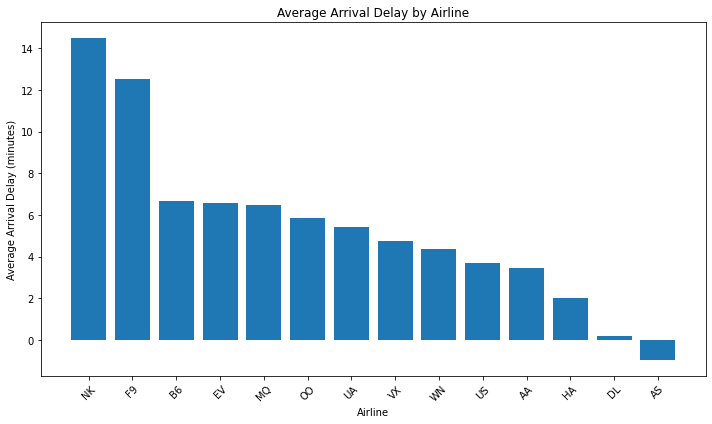

In [0]:
# Convert Spark DataFrame to Pandas for plotting
avg_delay_pd = avg_delay_df.toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(avg_delay_pd['AIRLINE'], avg_delay_pd['AvgArrivalDelay'])
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


  Visualize delay patterns over days of the week

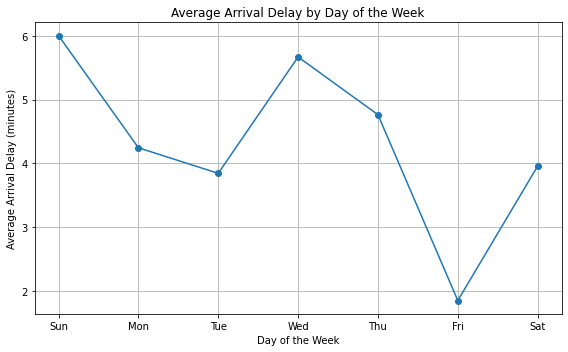

In [0]:
# Mapping day of the week numbers to names
day_of_week_map = {
    1: "Sun",
    2: "Mon",
    3: "Tue",
    4: "Wed",
    5: "Thu",
    6: "Fri",
    7: "Sat"
}

# Add a column with day names in the Pandas DataFrame
delay_by_day_pd['DayName'] = delay_by_day_pd['DAY_OF_WEEK'].map(day_of_week_map)

# Sort by day of the week to ensure correct order
delay_by_day_pd = delay_by_day_pd.sort_values(by='DAY_OF_WEEK')

# Plot
plt.figure(figsize=(8, 5))
plt.plot(delay_by_day_pd['DayName'], delay_by_day_pd['AvgArrivalDelay'], marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Day of the Week')
plt.grid(True)
plt.tight_layout()
plt.show()


  Which airlines had the highest average delays?
  Answer:
  From Average ArrivalDelay by Time plot, it appears that the airline with the highest average delay is NK, followed by F9 and B6. These three airlines have significantly higher average delays compared to others.NK has the highest average delay, with more than 15 minutes. F9 and B6 follows with an average delay of approximately 13 and 7 minutes respectively. On the other hand, airlines like AS and  HA shows very few time delay and AS show negative values, indicating these airlines are generally early or on time.

  What patterns did you observe in delays by day of the week?
  Answer:
  From the provided line chart, delays vary across the days of the week. The average delay is highest at the start of the week (Monday) and gradually decreases toward the mid-week. There is a slight increase mid-week (Wednesday or Thursday) before dropping significantly toward the end of the week (Saturday). The lowest average delay appears to occur on Saturday, with a sharp increase again on Sunday. This pattern suggests higher delays during busy travel periods like the start and end of the week, likely reflecting higher passenger volumes and operational congestion on those days. Mid-week and weekends tend to experience fewer delays, potentially due to lighter air traffic.



Summary:
The analysis revealed key insights into flight delays and cancellations. Airlines with the highest average delays were identified, highlighting potential operational inefficiencies or route-specific challenges. Delays varied by day of the week, with the highest delays observed on Mondays and Sundays, likely due to higher travel volumes, and the lowest delays on Saturdays, indicating smoother operations on weekends. Specific delay causes such as weather and airline issues were flagged, providing actionable insights into factors contributing to disruptions. The exploration of cancellation reasons showed weather as the most frequent cause, followed by operational issues. Overall, these findings provide a clearer understanding of delay and cancellation patterns, offering opportunities for airlines to improve scheduling and customer experience.